RESEARCH ABOUT COVID 19 IN INDIA AND IRAN

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

The pandemic virus has spread widely and the number is rising daily The government is woring to slow down its spread 



In this Notebook we will see the spread of corona virus in INDIA and IRAN

TASK TO BE PERFORMED


1.   Total number of cases til date(20/6/2020)
2.   Visualization with active cases with recovered cases
3.   Comapring the corona cases with INDIA and IRAN 
4.   Using PROPHET we will predict the data with active      97%confidence interval
5.   Inference from prediction 


Importing important libraries

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins

plt.rcParams['figure.figsize']=20,20
import warnings
warnings.filterwarnings('ignore')
print("DONE")

DONE


Scraping the data from offical website 

In [105]:
from datetime import datetime
import os
import re
import glob
import requests
from bs4 import BeautifulSoup
print("DONE")


DONE


Getting the data from website 

In [106]:
link='https://www.mohfw.gov.in/'
req=requests.get(link)
soup=BeautifulSoup(req.content,"html.parser")
print("DONE")

DONE


Find the table

In [107]:
thead=soup.find_all('thead')[-1]
head=thead.find_all('tr')
tbody=soup.find_all('tr')
tbody=soup.find_all('tbody')[-1]
body=tbody.find_all('tr')
print("DONE")

DONE


Get th table contents

In [108]:
head_rows=[]
body_rows=[]
for tr in head:
  td=tr.find_all(['th','td'])
  row=[i.text for i in td]
  head_rows.append(row)

  for tr in body:
    td=tr.find_all(['th','td'])
    row=[i.text for i in td]
    body_rows.append(row)
print("DONE")


DONE


Save the contents in dataframe

In [109]:
df_bs=pd.DataFrame(body_rows[:len(body_rows)-6],columns=head_rows[0])
df_bs.drop('S. No.',axis=1,inplace=True)#droping the column S.no
df_bs.head(36)


,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Andaman and Nicobar Islands,10,35,0,45
1,Andhra Pradesh,3948,3917,96,7961
2,Arunachal Pradesh,92,11,0,103
3,Assam,1856,3039,9,4904
4,Bihar,2033,5098,50,7181
5,Chandigarh,60,315,6,381
6,Chhattisgarh,687,1331,10,2028
7,Dadra and Nagar Haveli and Daman and Diu,48,14,0,62
8,Delhi,27512,23569,2035,53116
9,Goa,607,118,0,725


# DATA CLEANING 

In [110]:
df_India=df_bs.copy()
now=datetime.now()
df_India['Date']=now.strftime("%m/%d/%Y")
df_India['Date']=pd.to_datetime(df_India['Date'],format='%m/%d/%Y')
df_India.head(36)


,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*,Date
0,Andaman and Nicobar Islands,10,35,0,45,2020-06-21
1,Andhra Pradesh,3948,3917,96,7961,2020-06-21
2,Arunachal Pradesh,92,11,0,103,2020-06-21
3,Assam,1856,3039,9,4904,2020-06-21
4,Bihar,2033,5098,50,7181,2020-06-21
5,Chandigarh,60,315,6,381,2020-06-21
6,Chhattisgarh,687,1331,10,2028,2020-06-21
7,Dadra and Nagar Haveli and Daman and Diu,48,14,0,62,2020-06-21
8,Delhi,27512,23569,2035,53116,2020-06-21
9,Goa,607,118,0,725,2020-06-21


In [111]:
df_India['Name of State / UT']=df_India['Name of State / UT'].str.replace('#',' ')
df_India['Deaths**']=df_India['Deaths**'].str.replace('#',' ')

Latitude and longitude for states

In [112]:
# latitude and longitude information
# ==================================

# latitude of the states
lat = {'Delhi':28.7041, 'Haryana':29.0588, 'Kerala':10.8505, 'Rajasthan':27.0238,
       'Telengana':18.1124, 'Uttar Pradesh':26.8467, 'Ladakh':34.2996, 'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782, 'Punjab':31.1471, 'Karnataka':15.3173, 'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 'Odisha':20.9517, 'Uttarakhand':30.0668, 'West Bengal':22.9868, 
       'Puducherry': 11.9416, 'Chandigarh': 30.7333, 'Chhattisgarh':21.2787, 'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 'Madhya Pradesh': 22.9734, 'Bihar': 25.0961, 'Manipur':24.6637, 
       'Mizoram':23.1645, 'Goa': 15.2993, 'Andaman and Nicobar Islands': 11.7401, 'Assam' : 26.2006, 
       'Jharkhand': 23.6102, 'Arunachal Pradesh': 28.2180, 'Tripura': 23.9408, 'Nagaland': 26.1584, 
       'Meghalaya' : 25.4670, 'Dadar Nagar Haveli' : 20.1809, 'Sikkim': 27.5330}

# longitude of the states
long = {'Delhi':77.1025, 'Haryana':76.0856, 'Kerala':76.2711, 'Rajasthan':74.2179,
        'Telengana':79.0193, 'Uttar Pradesh':80.9462, 'Ladakh':78.2932, 'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762, 'Punjab':75.3412, 'Karnataka':75.7139, 'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 'Odisha':85.0985, 'Uttarakhand':79.0193, 'West Bengal':87.8550, 
        'Puducherry': 79.8083, 'Chandigarh': 76.7794, 'Chhattisgarh':81.8661, 'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 'Madhya Pradesh': 78.6569, 'Bihar': 85.3131, 'Manipur':93.9063, 
        'Mizoram':92.9376, 'Goa': 74.1240, 'Andaman and Nicobar Islands': 92.6586, 'Assam' : 92.9376, 
        'Jharkhand': 85.2799, 'Arunachal Pradesh': 94.7278, 'Tripura': 91.9882, 'Nagaland': 94.5624,
        'Meghalaya' : 91.3662, 'Dadar Nagar Haveli' : 73.0169, 'Sikkim': 88.5122}

# add latitude column based on 'Name of State / UT' column
df_India['Latitude'] = df_India['Name of State / UT'].map(lat)

# add longitude column based on 'Name of State / UT' column
df_India['Longitude'] = df_India['Name of State / UT'].map(long)

df_India.head(36)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,10,35,0,45,2020-06-21,11.7401,92.6586
1,Andhra Pradesh,3948,3917,96,7961,2020-06-21,15.9129,79.7400
2,Arunachal Pradesh,92,11,0,103,2020-06-21,28.2180,94.7278
3,Assam,1856,3039,9,4904,2020-06-21,26.2006,92.9376
4,Bihar,2033,5098,50,7181,2020-06-21,25.0961,85.3131
5,Chandigarh,60,315,6,381,2020-06-21,30.7333,76.7794
6,Chhattisgarh,687,1331,10,2028,2020-06-21,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,48,14,0,62,2020-06-21,NaN,NaN
8,Delhi,27512,23569,2035,53116,2020-06-21,28.7041,77.1025
9,Goa,607,118,0,725,2020-06-21,15.2993,74.1240


In [113]:

# rename columns
    
df_India = df_India.rename(columns={'Cured/Discharged/Migrated' :'Cured/Discharged', 
                                      'Total Confirmed cases *': 'Confirmed', 
                                      'Total Confirmed cases ': 'Confirmed', 
                                      'Total Confirmed cases* ': 'Confirmed'})
df_India = df_India.rename(columns={'Cured/Discharged':'Cured'})
df_India = df_India.rename(columns={'Name of State / UT':'State/UnionTerritory'})
df_India = df_India.rename(columns={'Name of State / UT':'State/UnionTerritory'})

df_India = df_India.rename(columns=lambda x: re.sub('Total Confirmed cases \(Including .* foreign Nationals\) ',
                                                      'Total Confirmed cases',x))
df_India = df_India.rename(columns={'Deaths ( more than 70% cases due to comorbidities )':'Deaths', 
                                      'Deaths**':'Deaths'})


In [114]:
df_India['State/UnionTerritory'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand',
       'Uttar Pradesh', 'West Bengal'], dtype=object)

In [115]:
df_India.isna().sum()

State/UnionTerritory          0
Active Cases*                 0
Cured/Discharged/Migrated*    0
Deaths                        0
Total Confirmed cases*        0
Date                          0
Latitude                      2
Longitude                     2
dtype: int64

In [116]:
df_India.nunique()

State/UnionTerritory          35
Active Cases*                 34
Cured/Discharged/Migrated*    34
Deaths                        25
Total Confirmed cases*        35
Date                           1
Latitude                      33
Longitude                     30
dtype: int64

In [117]:
file_name=now.strftime("%Y_%m_%d")+'COVID-19_India.csv'
file_loc='/content/'
df_India.to_csv(file_loc+file_name,index=False)

In [23]:
df_India['Date']=pd.to_datetime(df_India['Date'])

In [118]:
# rename state/UT names
df_India['State/UnionTerritory'].replace('Chattisgarh', 'Chhattisgarh', inplace=True)
df_India['State/UnionTerritory'].replace('Pondicherry', 'Puducherry', inplace=True) 

In [119]:
df_India.head(36)

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Total Confirmed cases*,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,10,35,0,45,2020-06-21,11.7401,92.6586
1,Andhra Pradesh,3948,3917,96,7961,2020-06-21,15.9129,79.7400
2,Arunachal Pradesh,92,11,0,103,2020-06-21,28.2180,94.7278
3,Assam,1856,3039,9,4904,2020-06-21,26.2006,92.9376
4,Bihar,2033,5098,50,7181,2020-06-21,25.0961,85.3131
5,Chandigarh,60,315,6,381,2020-06-21,30.7333,76.7794
6,Chhattisgarh,687,1331,10,2028,2020-06-21,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,48,14,0,62,2020-06-21,NaN,NaN
8,Delhi,27512,23569,2035,53116,2020-06-21,28.7041,77.1025
9,Goa,607,118,0,725,2020-06-21,15.2993,74.1240


In [26]:
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   State/UnionTerritory        35 non-null     object        
 1   Active Cases*               35 non-null     object        
 2   Cured/Discharged/Migrated*  35 non-null     object        
 3   Deaths                      35 non-null     object        
 4   Total Confirmed cases*      35 non-null     object        
 5   Date                        35 non-null     datetime64[ns]
 6   Latitude                    33 non-null     float64       
 7   Longitude                   33 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 2.3+ KB


In [27]:
file_name=now.strftime("%Y_%m_%d")+'-COVID-19_India_preprocess.csv'
file_loc='/content/'
df_India.to_csv(file_loc+file_name,index=False)

In [28]:
df=pd.read_csv('/content/2020_06_21-COVID-19_India_preprocess.csv')
df_india=df.copy()
df

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Total Confirmed cases*,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,10,35,0,45,2020-06-21,11.7401,92.6586
1,Andhra Pradesh,3948,3917,96,7961,2020-06-21,15.9129,79.7400
2,Arunachal Pradesh,92,11,0,103,2020-06-21,28.2180,94.7278
3,Assam,1856,3039,9,4904,2020-06-21,26.2006,92.9376
4,Bihar,2033,5098,50,7181,2020-06-21,25.0961,85.3131
5,Chandigarh,60,315,6,381,2020-06-21,30.7333,76.7794
6,Chhattisgarh,687,1331,10,2028,2020-06-21,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,48,14,0,62,2020-06-21,NaN,NaN
8,Delhi,27512,23569,2035,53116,2020-06-21,28.7041,77.1025
9,Goa,607,118,0,725,2020-06-21,15.2993,74.1240


In [29]:
total_cases=df['Total Confirmed cases*'].sum()
print("Total number of cases till 21th June 2020",total_cases)

Total number of cases till 20th June 2020 385783


In [31]:
#Learn how to highlight your dataframe
df_temp = df.drop(['Latitude', 'Longitude', 'Date'], axis = 1) #Removing Date, Latitude and Longitude and other extra columns
df_temp.style.background_gradient(cmap='Reds')

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Total Confirmed cases*
0,Andaman and Nicobar Islands,10,35,0,45
1,Andhra Pradesh,3948,3917,96,7961
2,Arunachal Pradesh,92,11,0,103
3,Assam,1856,3039,9,4904
4,Bihar,2033,5098,50,7181
5,Chandigarh,60,315,6,381
6,Chhattisgarh,687,1331,10,2028
7,Dadra and Nagar Haveli and Daman and Diu,48,14,0,62
8,Delhi,27512,23569,2035,53116
9,Goa,607,118,0,725


In [32]:
today = now.strftime("%Y_%m_%d")
total_cured = df['Cured/Discharged/Migrated*'].sum()
print("Total people who were cured as of "+today+" are: ", total_cured)
total_cases = df['Total Confirmed cases*'].sum()
print("Total people who were detected COVID+ve as of "+today+" are: ", total_cases)
total_death = df['Deaths'].sum()
print("Total people who died due to COVID19 as of "+today+" are: ",total_death)
total_active = total_cases-total_cured-total_death
print("Total active COVID19 cases as of "+today+" are: ",total_active)

Total people who were cured as of 2020_06_21 are:  213831
Total people who were detected COVID+ve as of 2020_06_21 are:  385783
Total people who died due to COVID19 as of 2020_06_21 are:  12948
Total active COVID19 cases as of 2020_06_21 are:  159004


Adding a column from existing values 

Total Number Of Active Cases

In [33]:
df['Total Active']=df['Total Confirmed cases*']-(df['Deaths']+df['Cured/Discharged/Migrated*'])
total_active=df['Total Active'].sum()
print("Total number of cases across India",total_active)
Tot_Cases=df.groupby('State/UnionTerritory')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of cases across India 159004


,Total Active
State/UnionTerritory,
Maharashtra,55665
Delhi,27512
Tamil Nadu,23512
Gujarat,6364
Uttar Pradesh,5659
West Bengal,5258
Haryana,4710
Andhra Pradesh,3948
Telangana,2975


**CORONA CASES IN IRAN**

In [229]:
from pandas.io.json import json_normalize
import requests 

In [230]:
# to parse json contents
import json
# to parse csv files
import csv

GETTING THE DATA FROM WEBSITE 

In [231]:
response = requests.get('https://api.apify.com/v2/key-value-stores/XV4DWf1ctkSPA8H99/records/LATEST?disableRedirect=true')
# get contents from the response
content = response.content
# parse the json file
parsed = json.loads(content)
# keys
parsed.keys()

dict_keys(['activeCases', 'recovered', 'deceased', 'newCases', 'infected', 'country', 'historyData', 'sourceUrl', 'lastUpdatedAtApify', 'lastUpdatedAtSource', 'readMe'])

In [232]:
df_a = pd.DataFrame(list(parsed.items()),columns=['STATUS','VALUE'])
# shape of the dataframe
print(df_a.shape)

# # list of columns
print(df_a.columns)

# # first few rows
df_a.head()

(11, 2)
Index(['STATUS', 'VALUE'], dtype='object')


,STATUS,VALUE
0,activeCases,106220
1,recovered,85064
2,deceased,6589
3,newCases,1529
4,infected,197873


In [236]:
df_a.sort_values(by=['VALUE'], inplace=True)
df_a

,STATUS,VALUE
3,newCases,1529
2,deceased,6589
1,recovered,85064
0,activeCases,106220
4,infected,197873


In [235]:
df_a.drop(df_a.index[5:],inplace=True)
df_a

,STATUS,VALUE
0,activeCases,106220
1,recovered,85064
2,deceased,6589
3,newCases,1529
4,infected,197873


In [237]:
status=list(map(str,df_a['STATUS']))
value=list(map(str,df_a['VALUE']))

PLOTTING THE VALUE

Text(0.5, 0, 'STATUS')

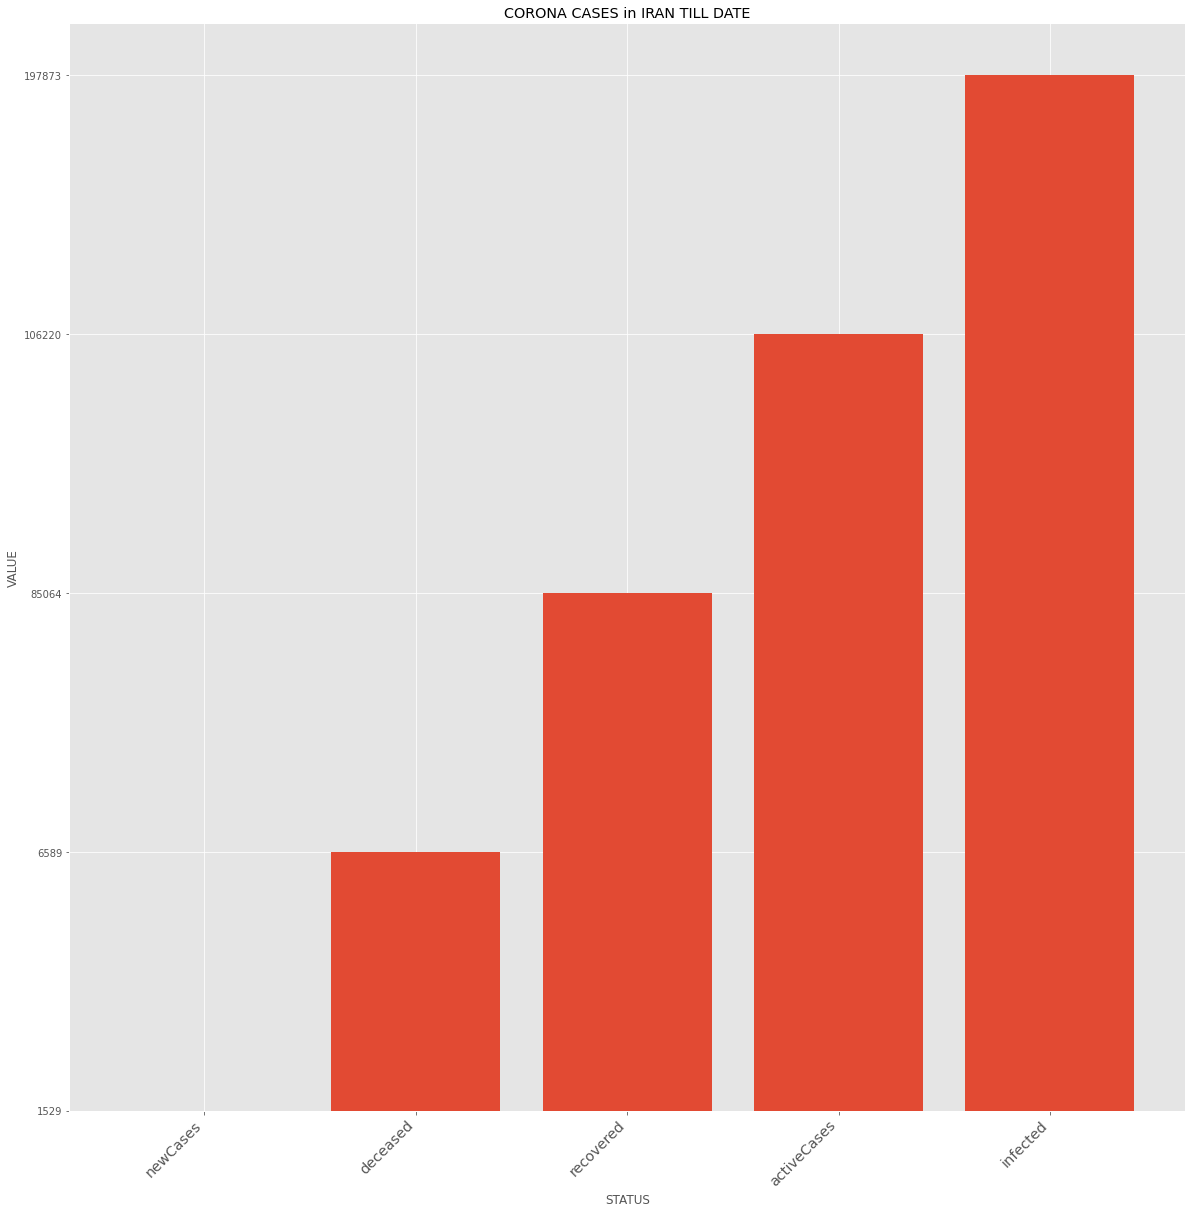

In [238]:
plt.bar(status,value)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)


plt.title('CORONA CASES in IRAN TILL DATE')
plt.ylabel('VALUE')
plt.xlabel('STATUS')


In [ ]:
link='https://www.worldometers.info/coronavirus/#countries'
req=requests.get(link)
soup=BeautifulSoup(req.content,"html.parser")
print("DONE")

DONE


In [ ]:
thead=soup.find_all('thead')[-1]
head=thead.find_all('tr')
tbody=soup.find_all('tr')
tbody=soup.find_all('tbody')[-1]
body=tbody.find_all('tr')
print("DONE")

DONE


In [ ]:
head_rows=[]
body_rows=[]
for tr in head:
  td=tr.find_all(['th','td'])
  row=[i.text for i in td]
  head_rows.append(row)

  for tr in body:
    td=tr.find_all(['th','td'])
    row=[i.text for i in td]
    body_rows.append(row)
print("DONE")


DONE


In [101]:
df_b=pd.DataFrame(body_rows[:len(body_rows)],columns=head_rows[0])
df_b.head(3)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,,Total:,"8,751,633","+180,874","461,838","+5,078","4,620,464","+109,018","3,669,331","54,791","1,122.8",59.2,,,,All,\n,,


# Visualization 

In [ ]:
df.set_index('State/UnionTerritory', inplace=True)

In [142]:
df.reset_index('State/UnionTerritory',inplace=True)

In [157]:
print(plt.style.available)
plt.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [143]:
df.head(36)

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Total Confirmed cases*,Date,Latitude,Longitude,Total Active
0,Andaman and Nicobar Islands,10,35,0,45,2020-06-21,11.7401,92.6586,10
1,Andhra Pradesh,3948,3917,96,7961,2020-06-21,15.9129,79.7400,3948
2,Arunachal Pradesh,92,11,0,103,2020-06-21,28.2180,94.7278,92
3,Assam,1856,3039,9,4904,2020-06-21,26.2006,92.9376,1856
4,Bihar,2033,5098,50,7181,2020-06-21,25.0961,85.3131,2033
5,Chandigarh,60,315,6,381,2020-06-21,30.7333,76.7794,60
6,Chhattisgarh,687,1331,10,2028,2020-06-21,21.2787,81.8661,687
7,Dadra and Nagar Haveli and Daman and Diu,48,14,0,62,2020-06-21,NaN,NaN,48
8,Delhi,27512,23569,2035,53116,2020-06-21,28.7041,77.1025,27512
9,Goa,607,118,0,725,2020-06-21,15.2993,74.1240,607


In [144]:
active = list(map(str, df['Active Cases*']))

In [145]:
region=list(map(str,df['State/UnionTerritory']))

In [146]:
df.isnull()

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Total Confirmed cases*,Date,Latitude,Longitude,Total Active
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,True,True,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [147]:
df.fillna(0)

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Total Confirmed cases*,Date,Latitude,Longitude,Total Active
0,Andaman and Nicobar Islands,10,35,0,45,2020-06-21,11.7401,92.6586,10
1,Andhra Pradesh,3948,3917,96,7961,2020-06-21,15.9129,79.7400,3948
2,Arunachal Pradesh,92,11,0,103,2020-06-21,28.2180,94.7278,92
3,Assam,1856,3039,9,4904,2020-06-21,26.2006,92.9376,1856
4,Bihar,2033,5098,50,7181,2020-06-21,25.0961,85.3131,2033
5,Chandigarh,60,315,6,381,2020-06-21,30.7333,76.7794,60
6,Chhattisgarh,687,1331,10,2028,2020-06-21,21.2787,81.8661,687
7,Dadra and Nagar Haveli and Daman and Diu,48,14,0,62,2020-06-21,0.0000,0.0000,48
8,Delhi,27512,23569,2035,53116,2020-06-21,28.7041,77.1025,27512
9,Goa,607,118,0,725,2020-06-21,15.2993,74.1240,607


In [148]:
df.isnull()

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Total Confirmed cases*,Date,Latitude,Longitude,Total Active
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,True,True,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   State/UnionTerritory        35 non-null     object 
 1   Active Cases*               35 non-null     int64  
 2   Cured/Discharged/Migrated*  35 non-null     int64  
 3   Deaths                      35 non-null     int64  
 4   Total Confirmed cases*      35 non-null     int64  
 5   Date                        35 non-null     object 
 6   Latitude                    33 non-null     float64
 7   Longitude                   33 non-null     float64
 8   Total Active                35 non-null     int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 2.6+ KB


VISUALIZING THE CORONA CASES IN DIFFERENT STATES

Text(0.5, 0, 'ACTIVE CASES')

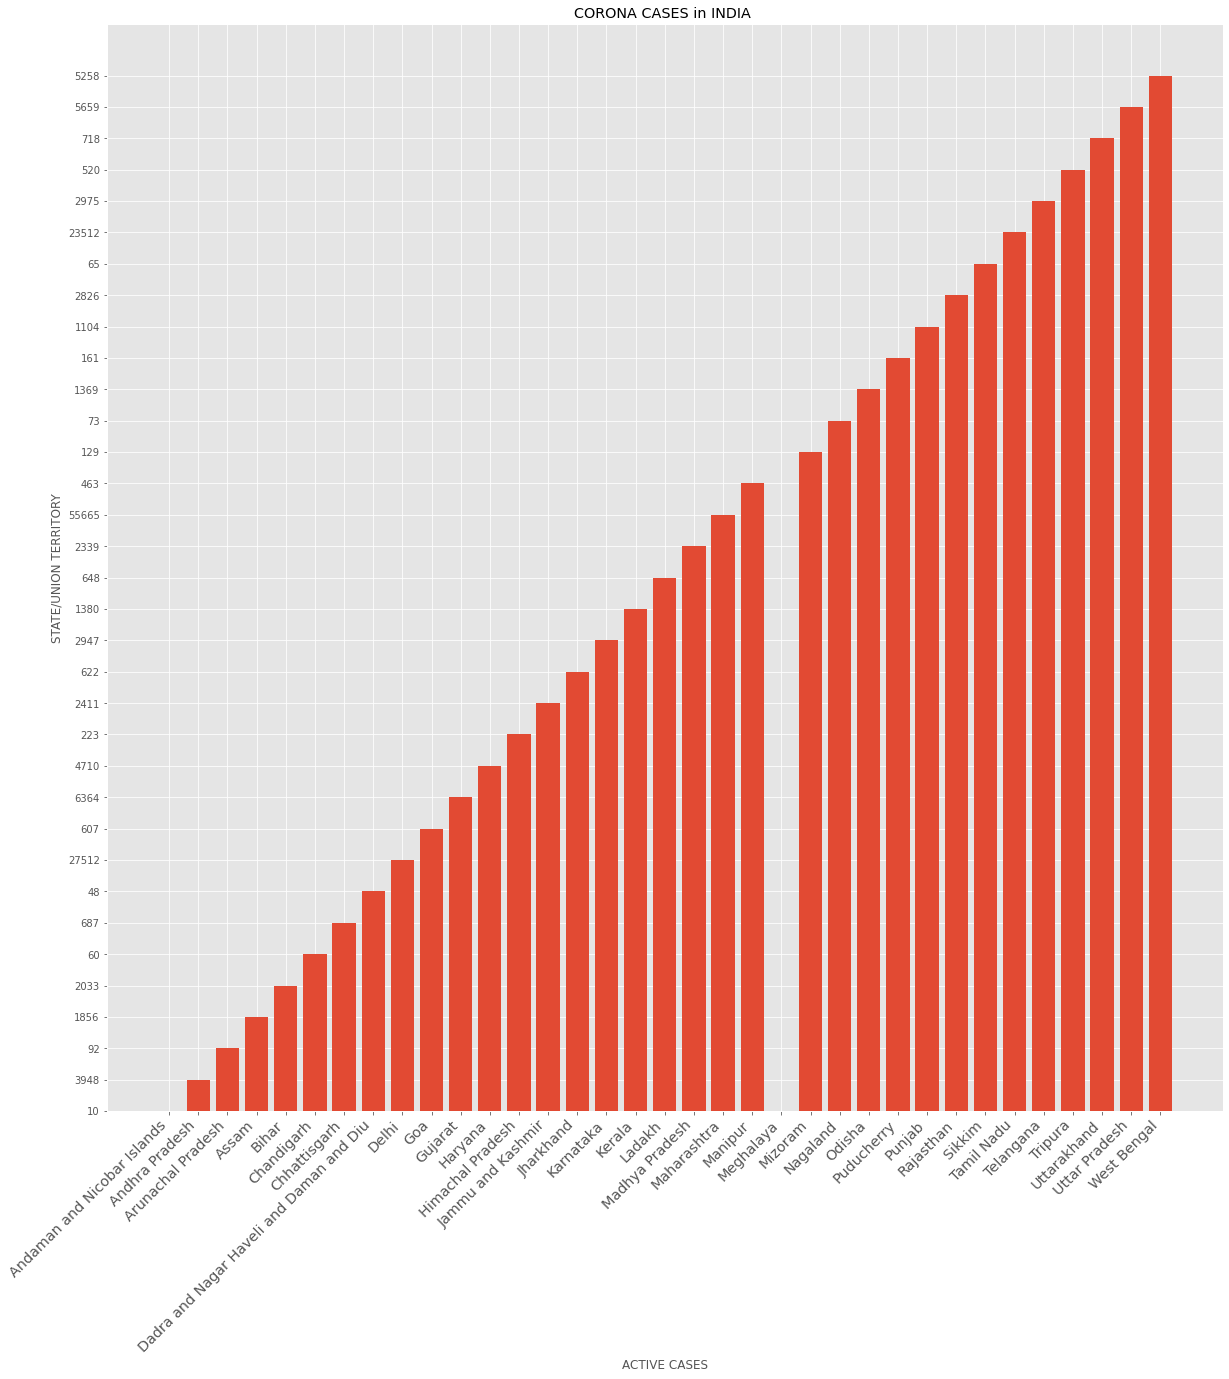

In [170]:
plt.bar(region,active)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.title('CORONA CASES in INDIA ')
plt.ylabel('STATE/UNION TERRITORY')
plt.xlabel('ACTIVE CASES')


Text(0.5, 0, 'ACTIVE CASES')

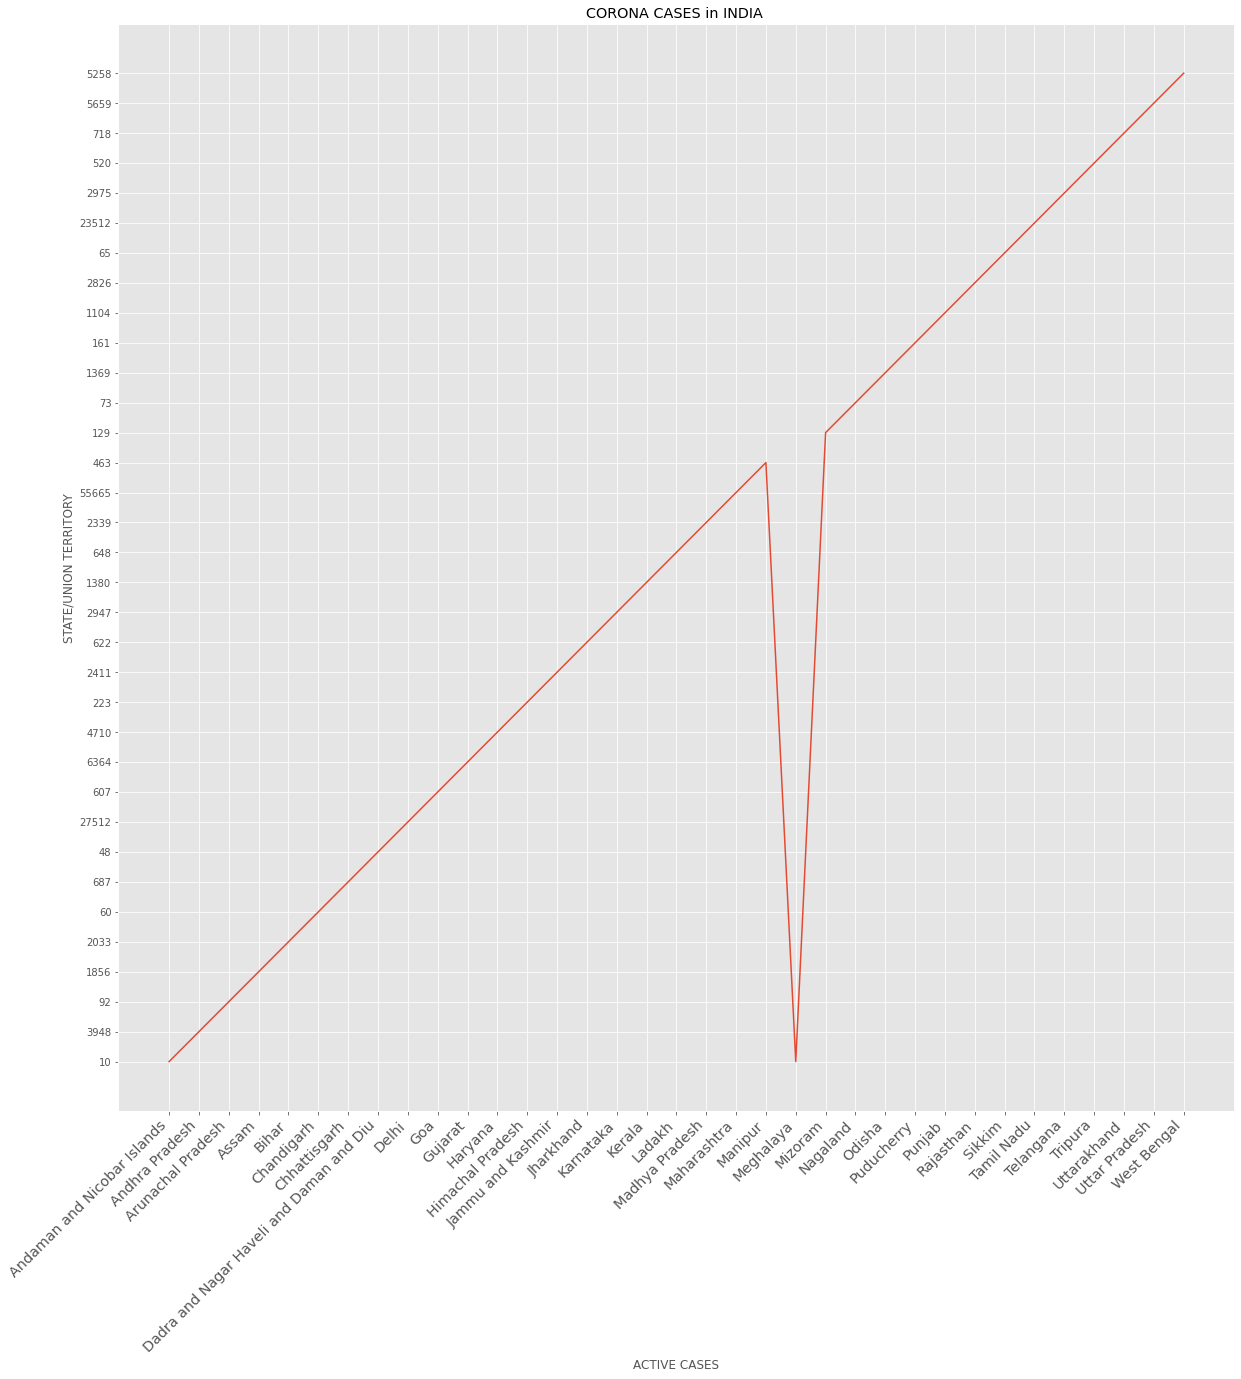

In [171]:
plt.plot(region,active)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.title('CORONA CASES in INDIA ')
plt.ylabel('STATE/UNION TERRITORY')
plt.xlabel('ACTIVE CASES')


Text(0.5, 0, 'ACTIVE CASES')

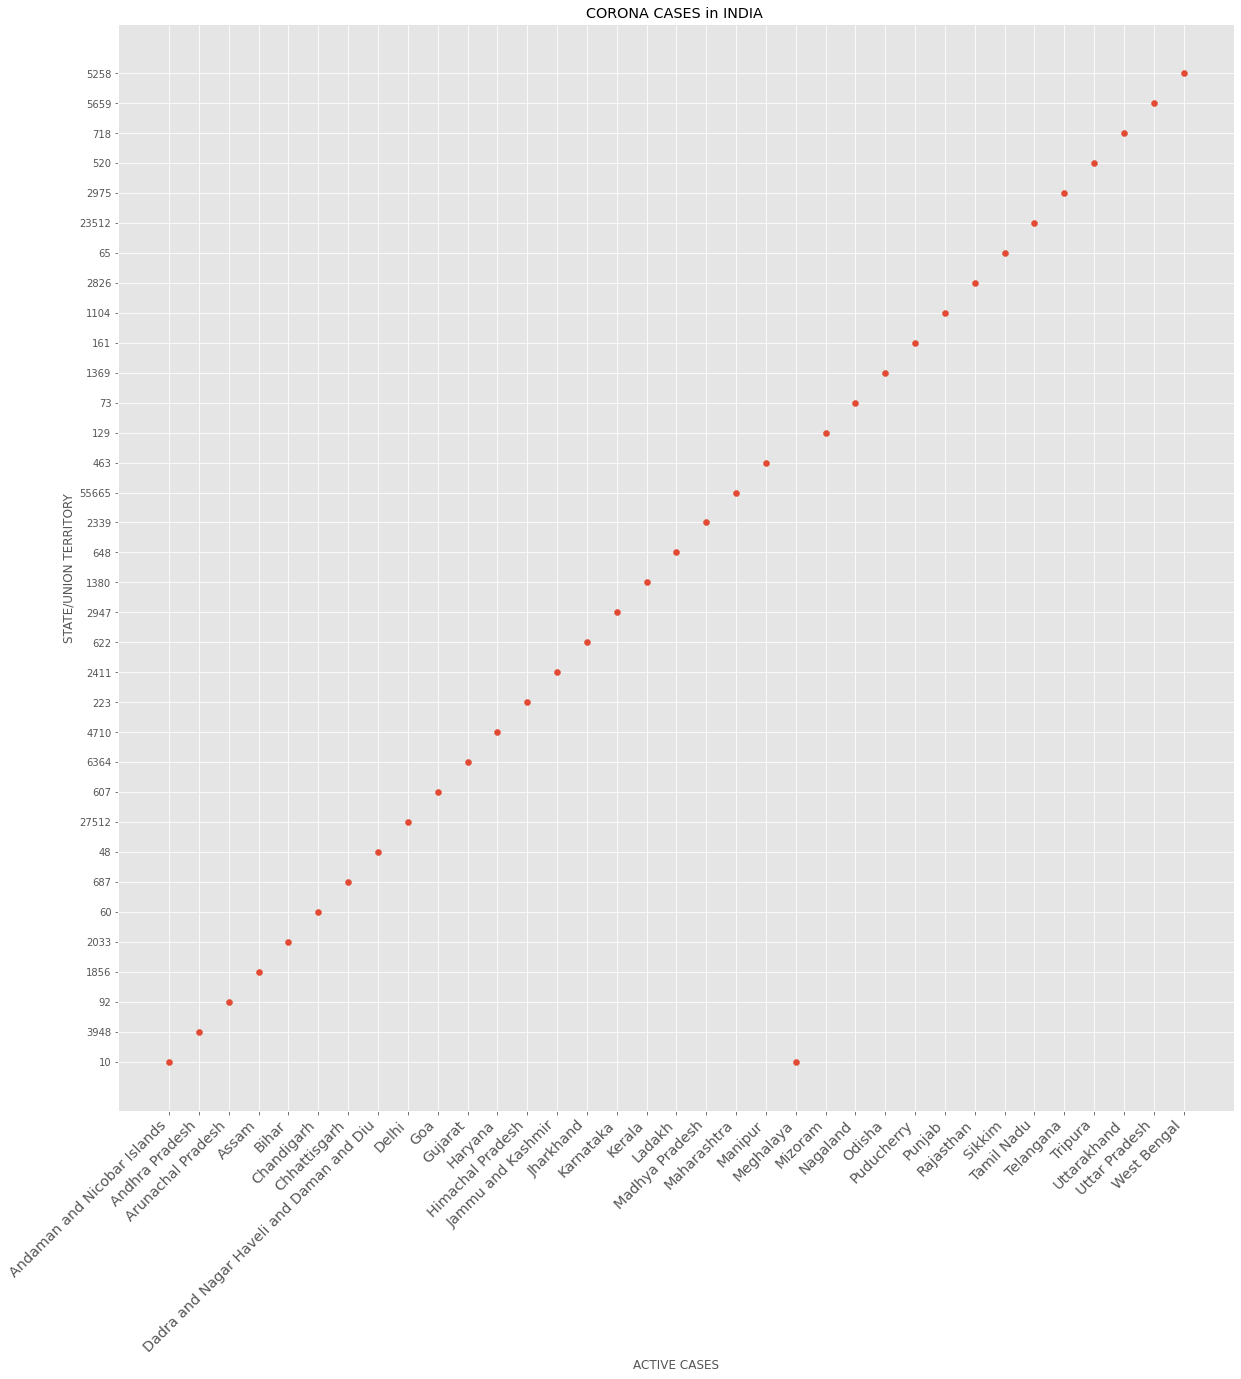

In [173]:
plt.scatter(region,active)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.title('CORONA CASES in INDIA ')
plt.ylabel('STATE/UNION TERRITORY')
plt.xlabel('ACTIVE CASES')


COMPARNG IRAN AND INDIA

In [225]:
total_active=df['Total Active'].sum()
print("Total number of cases across India",total_active)


Total number of cases across India 159004


In [247]:
a=df_a.iloc[3]
a

STATUS    activeCases
VALUE          106220
Name: 0, dtype: object

In [259]:
b=df_a.at[0,'VALUE']
b

106220

In [319]:
data_active={'India':total_active,'Iran':b}
df_new = pd.DataFrame (data_active, columns = ['India','Iran'],index=[1])
df_new

,India,Iran
1,159004,106220


In [320]:
country=df_new.columns.tolist()
country
cases=df_new.iloc[0]
cases

India    159004
Iran     106220
Name: 1, dtype: int64

In [337]:
df_c=df_new.transpose()
df_c

,1
India,159004
Iran,106220


PLOTTING THE ACTIVE CASES OF INDIA AND IRAN

Text(0.5, 0, 'COUNTRY')

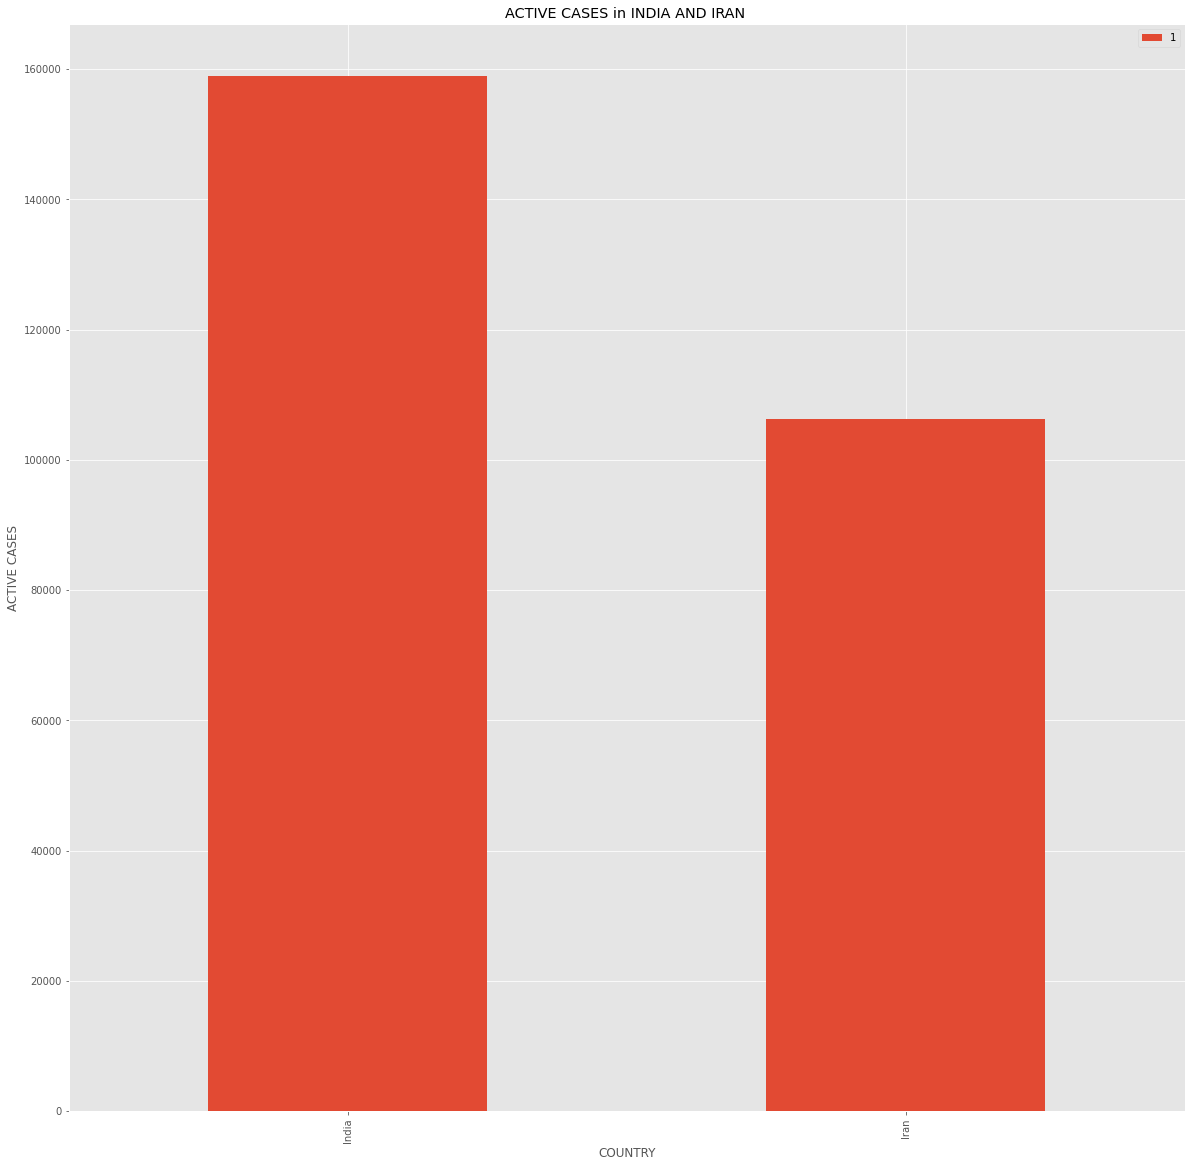

In [340]:
df_c.plot(kind='bar')
plt.title('ACTIVE CASES in INDIA AND IRAN ')
plt.ylabel('ACTIVE CASES')
plt.xlabel('COUNTRY')

From this graph we can conclude that India is affected more than Iran.

**PREDICTING THE CORONA CASES IN INDIA**

Forecasting is a technique that uses historical data as inputs to make informed estimates that are predictive in determining the direction of future trends. It is an important and common data science task in organisations today. Having prior knowledge of any event can help a company tremendously in the formulation of its goals, policies and planning. However, producing high-quality and reliable forecasts comes with challenges of its own. Forecasting is a complex phenomenon both for humans and for machines. It also requires very experienced time series analysts which as a matter of fact are quite rare.

**USING PROPHET**




ABOUT PROPHET

Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

PROPHET is fast and accurate and fully automatic  and tunable parameters


In [347]:
!pip install Prophet

     |████████████████████████████████| 92kB 3.3MB/s 
  Created wheel for Prophet: filename=prophet-0.1.1.post1-cp36-none-any.whl size=13236 sha256=d57c1e14dc5645cb1c9b5bcec8f80f72d392124d785dc77283a61f6cfb92616a
  Stored in directory: /root/.cache/pip/wheels/71/d7/4f/0ade9b5843362f84d39c21edbe6065032e388053c4ab0ab83e
Successfully built Prophet


In [356]:
df_train = pd.read_csv (r"train.csv") 
df_train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [357]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [358]:
df_test = pd.read_csv (r"test.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])

In [380]:
df_dum=df_train.drop(columns=['Id','Province_State','Fatalities'])
df_dum.head()

,Country_Region,Date,ConfirmedCases
0,Afghanistan,2020-01-22,0.0
1,Afghanistan,2020-01-23,0.0
2,Afghanistan,2020-01-24,0.0
3,Afghanistan,2020-01-25,0.0
4,Afghanistan,2020-01-26,0.0


In [388]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

k = df_dum[df_dum['Country_Region']=='India']

india_confirmed = k.values.tolist()
data = pd.DataFrame(india_confirmed,columns = ['india','ds','y'])
data.head()
imp=data.drop('india',axis=1)
imp.head()

,ds,y
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


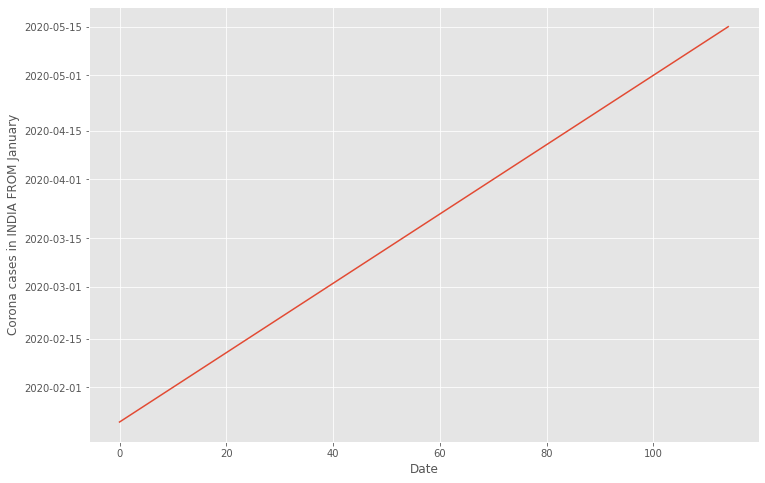

In [392]:
ax = imp['ds'].plot(figsize=(12, 8))
ax.set_ylabel('Corona cases in INDIA FROM January')
ax.set_xlabel('Date')

plt.show()

**Predicting the cases with confidence interval 97%**

In [393]:
my_model = Prophet(interval_width=0.97)
my_model.fit(imp)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


***Predicting for next days ...........***

In [405]:
future_dates = my_model.make_future_dataframe(periods=46)
future_dates.tail(10)

,ds
151,2020-06-21
152,2020-06-22
153,2020-06-23
154,2020-06-24
155,2020-06-25
156,2020-06-26
157,2020-06-27
158,2020-06-28
159,2020-06-29
160,2020-06-30


In [406]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
156,2020-06-26,190262.288005,161141.656594,217112.302854
157,2020-06-27,192506.217157,163460.263340,219423.463529
158,2020-06-28,195226.559975,163896.756088,221890.644112
159,2020-06-29,197994.485693,166685.861976,226202.326071
160,2020-06-30,200692.473005,166579.500583,230143.358798


**Plotting the prdictions !!!!**

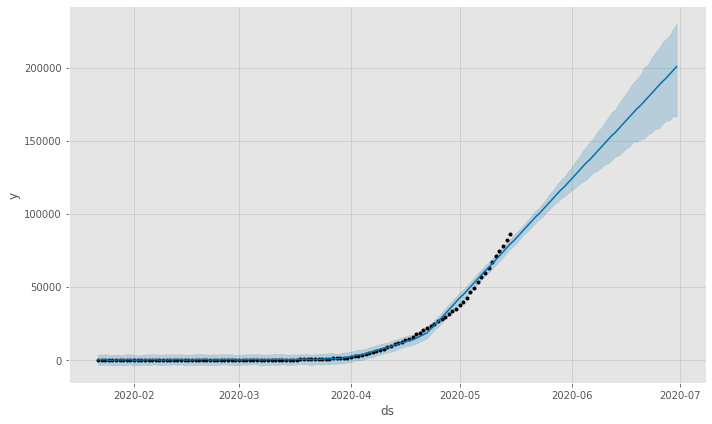

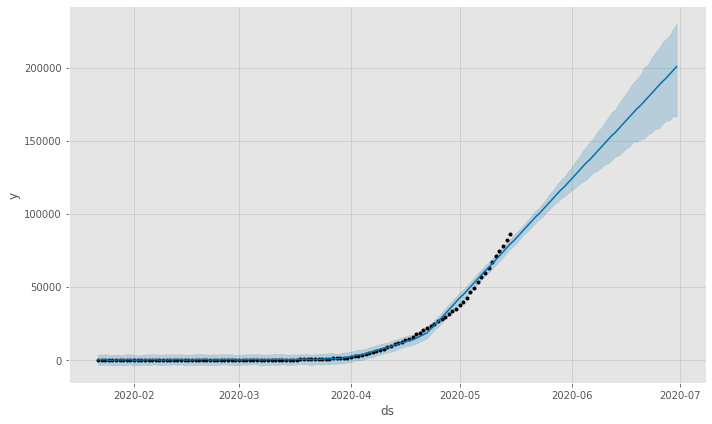

In [407]:
my_model.plot(forecast,
              uncertainty=True)

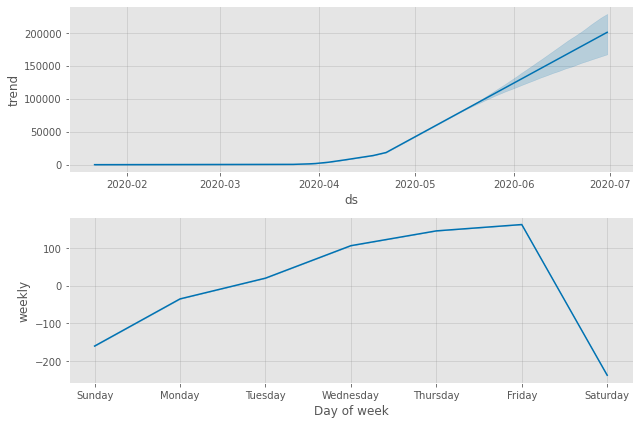

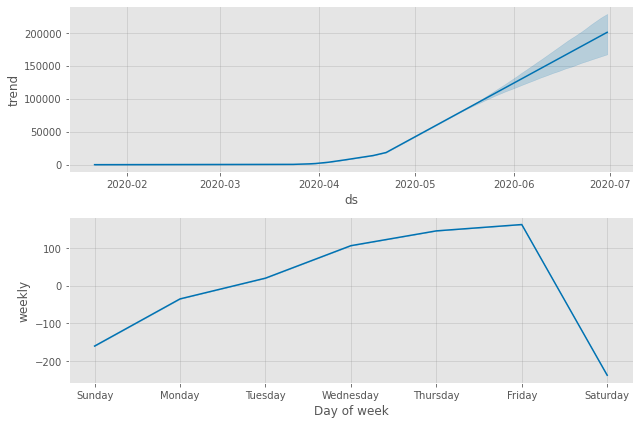

In [408]:
my_model.plot_components(forecast)

In [424]:
f = df_dum[df_dum['Country_Region']=='Iran']

iran_confirmed = f.values.tolist()
data1 = pd.DataFrame(iran_confirmed,columns = ['iran','ds','y'])
data1.head()
iran=data1.drop('iran',axis=1)
iran.head()

,ds,y
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


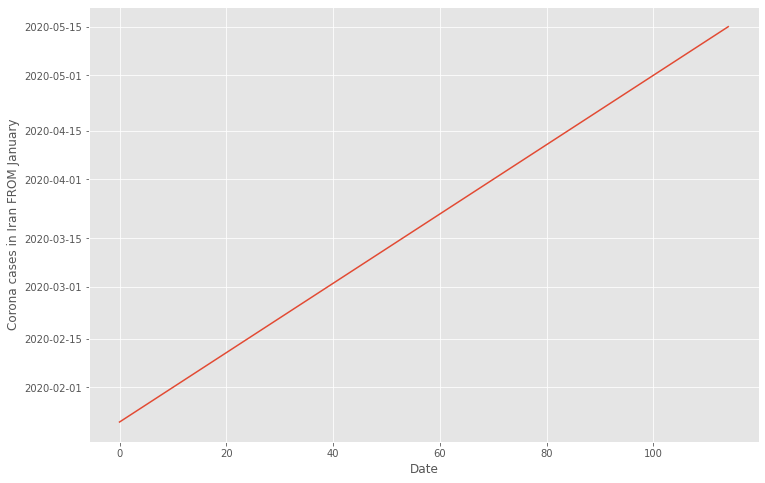

In [425]:
ax = iran['ds'].plot(figsize=(12, 8))
ax.set_ylabel('Corona cases in Iran FROM January')
ax.set_xlabel('Date')

plt.show()

In [426]:
my_model_iran = Prophet(interval_width=0.97)
my_model_iran.fit(iran)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [427]:
future_dates_iran = my_model_iran.make_future_dataframe(periods=46)
future_dates_iran.tail(10)

,ds
151,2020-06-21
152,2020-06-22
153,2020-06-23
154,2020-06-24
155,2020-06-25
156,2020-06-26
157,2020-06-27
158,2020-06-28
159,2020-06-29
160,2020-06-30


In [428]:
forecast_iran = my_model_iran.predict(future_dates_iran)
forecast_iran[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
156,2020-06-26,166517.895628,125347.506683,207367.744265
157,2020-06-27,167594.074405,126066.865799,209584.449598
158,2020-06-28,168830.893114,126803.995099,213278.609697
159,2020-06-29,170104.705903,127344.793869,215540.544672
160,2020-06-30,171389.435488,126885.082832,218636.079164


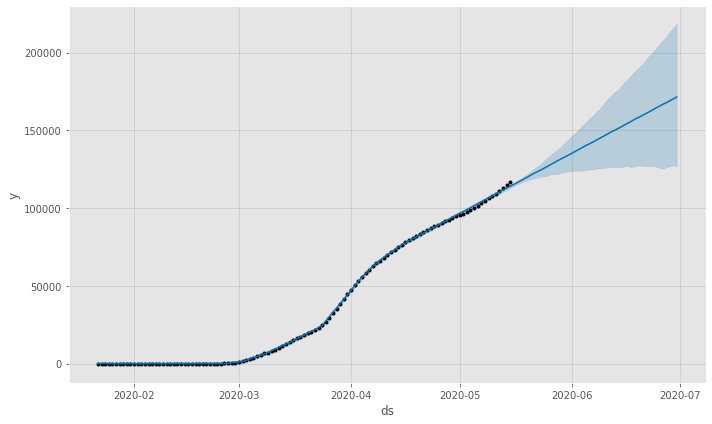

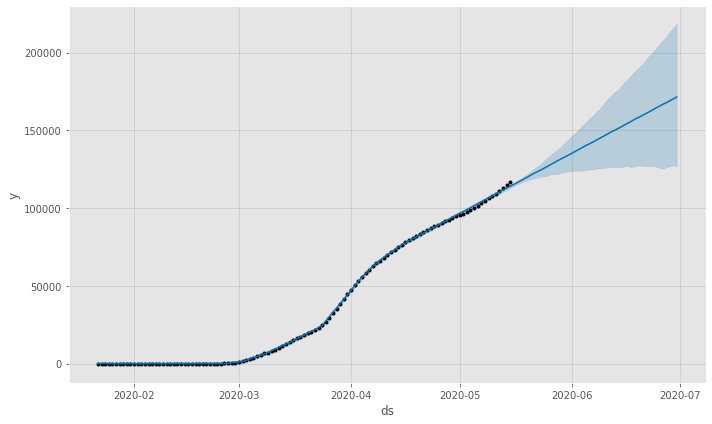

In [429]:
my_model_iran.plot(forecast_iran,
              uncertainty=True)

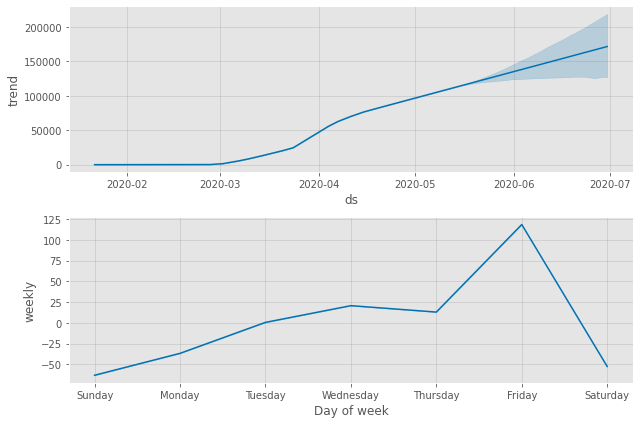

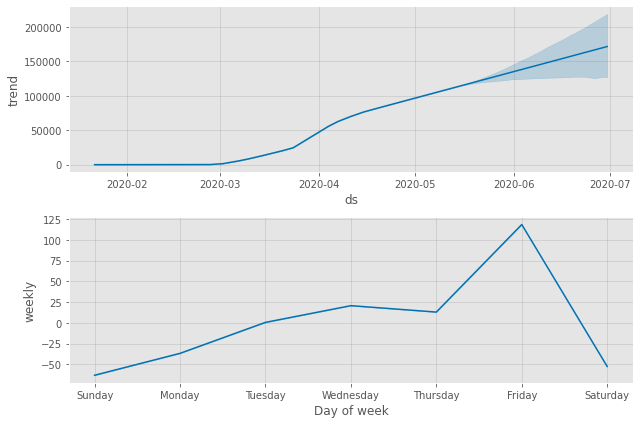

In [430]:
my_model_iran.plot_components(forecast_iran)

**Inference**

Due to population the spread of corona cases is more is India than Iran

from the graph of Active cases in India and Iran  we can see
the number is more in India than Iran.This shows the spread of corona virus in India


From predictions we can see that the number will increase sharply  in India and no possible of decrease in number 

